
==================== Dataset_1_Yapay ANALİZİ ====================
Sütunlar: ['person_name', 'age', 'date', 'gender', 'platform', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state']
✅ Grafik kaydedildi: ../images/Korelasyon_Dataset_1_Yapay.png


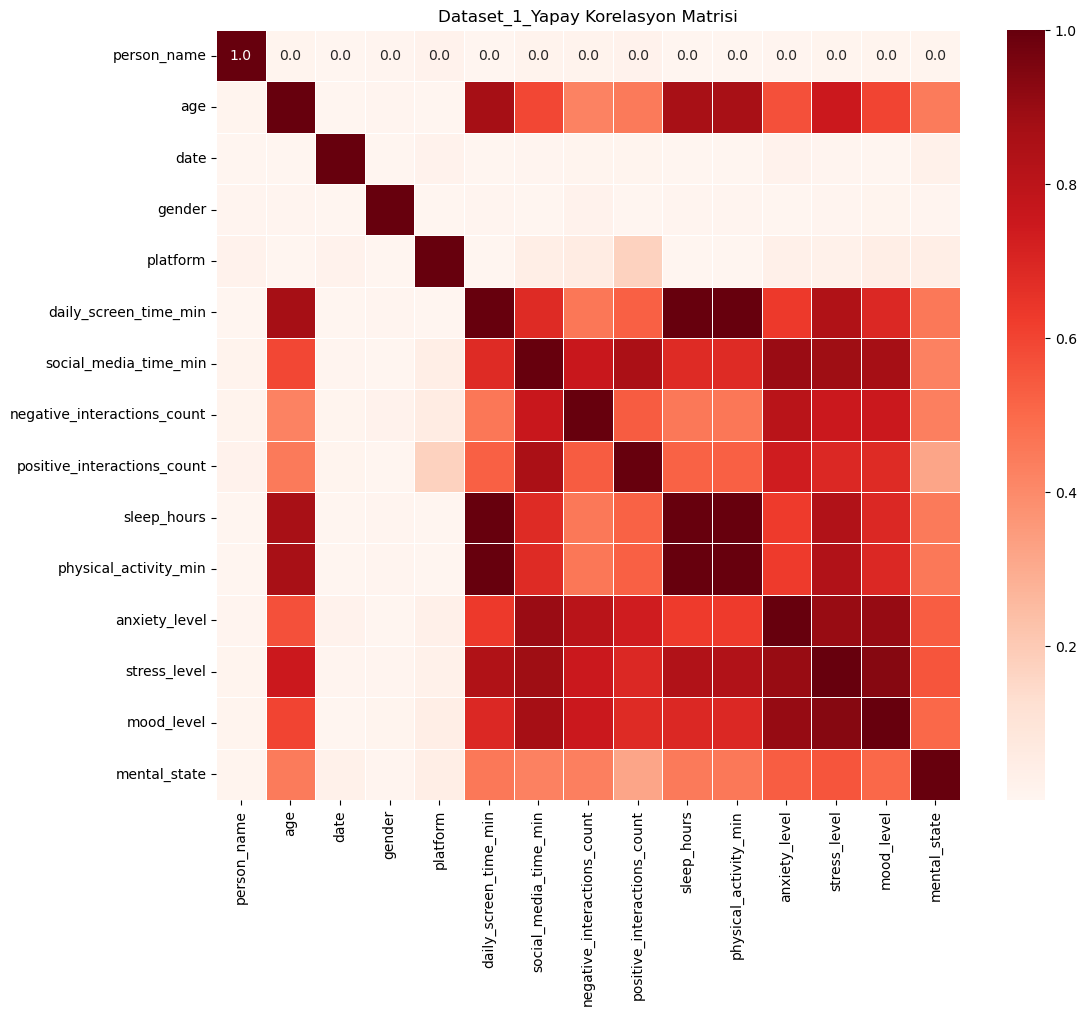


🚨 Dataset_1_Yapay İÇİNDEKİ 'EZBERCİ' SÜTUNLAR:
   ⚠️  'daily_screen_time_min' ile 'age' arasındaki ilişki: %87
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'positive_interactions_count' ile 'social_media_time_min' arasındaki ilişki: %85
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'sleep_hours' ile 'age' arasındaki ilişki: %86
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'sleep_hours' ile 'daily_screen_time_min' arasındaki ilişki: %100
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'physical_activity_min' ile 'age' arasındaki ilişki: %87
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'physical_activity_min' ile 'daily_screen_time_min' arasındaki ilişki: %100
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'physical_activity_min' ile 'sleep_hours' arasındaki ilişki: %100
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'anxiety_level' ile 'social_media_time_min' arasındaki ilişki: %90
       -> Yorum

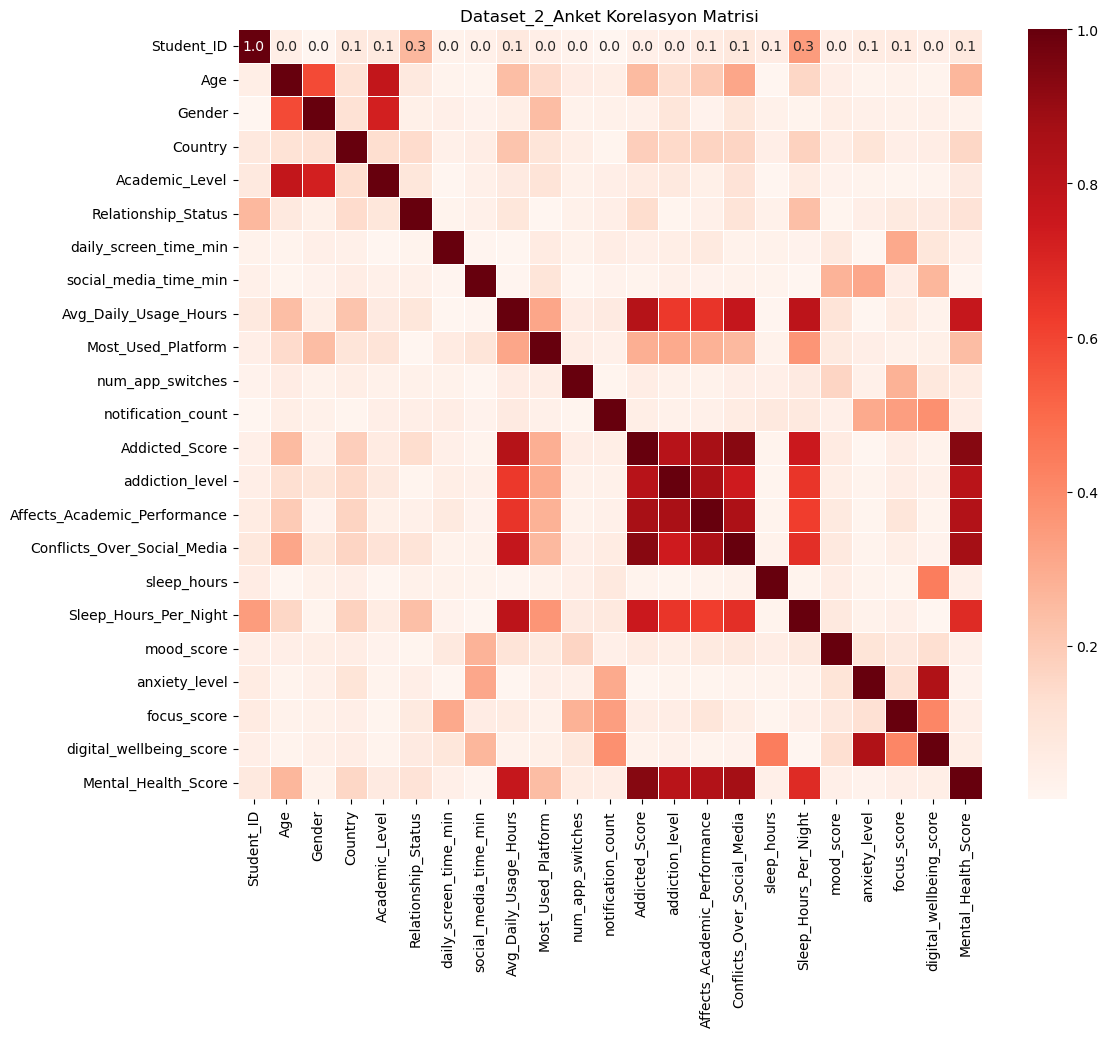


🚨 Dataset_2_Anket İÇİNDEKİ 'EZBERCİ' SÜTUNLAR:
   ⚠️  'Addicted_Score' ile 'Avg_Daily_Usage_Hours' arasındaki ilişki: %82
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'addiction_level' ile 'Addicted_Score' arasındaki ilişki: %82
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'Affects_Academic_Performance' ile 'Addicted_Score' arasındaki ilişki: %86
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'Affects_Academic_Performance' ile 'addiction_level' arasındaki ilişki: %86
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'Conflicts_Over_Social_Media' ile 'Addicted_Score' arasındaki ilişki: %93
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'Conflicts_Over_Social_Media' ile 'Affects_Academic_Performance' arasındaki ilişki: %85
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'digital_wellbeing_score' ile 'anxiety_level' arasındaki ilişki: %84
       -> Yorum: Bunlardan sadece birini almalıyız.
   ⚠️  'Mental_Health_Score

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os

# --- AYARLAR ---
img_save_dir = '../images'
if not os.path.exists(img_save_dir):
    os.makedirs(img_save_dir)

file_path_ds1 = '../data/mental_health_social_media_dataset.csv' # Dataset 1 (Yapay)
file_path_ds2 = '../data/social_media data.csv'                # Dataset 2 (Anket)

# --- ANALİZ FONKSİYONU ---
def show_correlation(file_path, name):
    print(f"\n{'='*20} {name} ANALİZİ {'='*20}")
    
    if not os.path.exists(file_path):
        print(f"❌ HATA: {file_path} bulunamadı.")
        return

    df = pd.read_csv(file_path)
    print(f"Sütunlar: {df.columns.tolist()}")
    
    # 1. Encoding (Yazıları Sayıya Çevir)
    df_temp = df.copy()
    le = LabelEncoder()
    
    for col in df_temp.columns:
        if df_temp[col].dtype == 'object':
            df_temp[col] = df_temp[col].fillna('Unknown')
            df_temp[col] = le.fit_transform(df_temp[col].astype(str))
            
    # 2. Korelasyon Hesapla
    corr_matrix = df_temp.corr().abs()
    
    # 3. Görselleştir (Heatmap)
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='Reds', linewidths=0.5)
    plt.title(f'{name} Korelasyon Matrisi')
    
    save_path = f"{img_save_dir}/Korelasyon_{name.split()[0]}.png"
    plt.savefig(save_path)
    print(f"✅ Grafik kaydedildi: {save_path}")
    plt.show()
    
    # 4. KRİTİK RAPOR: Hangi sütunlar birbirinin aynısı?
    # Köşegenin üstünde kalanlara bak (Tekrar olmasın diye)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # %80 üzeri benzerlik gösterenleri bul
    high_corr = [column for column in upper.columns if any(upper[column] > 0.80)]
    
    print(f"\n🚨 {name} İÇİNDEKİ 'EZBERCİ' SÜTUNLAR:")
    if len(high_corr) > 0:
        for col in high_corr:
            # Neyle benzer?
            partners = upper.index[upper[col] > 0.80].tolist()
            for p in partners:
                val = upper.loc[p, col]
                print(f"   ⚠️  '{col}' ile '{p}' arasındaki ilişki: %{val*100:.0f}")
                print(f"       -> Yorum: Bunlardan sadece birini almalıyız.")
    else:
        print("   -> Temiz. Çok yüksek korelasyonlu sütun yok.")

# --- ÇALIŞTIR ---
show_correlation(file_path_ds1, "Dataset_1_Yapay")
show_correlation(file_path_ds2, "Dataset_2_Anket")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os

# --- AYARLAR ---
# Klasörler
img_save_dir = '../images'
if not os.path.exists(img_save_dir):
    os.makedirs(img_save_dir)

# Dosya Yolları
path_ds1 = '../data/mental_health_social_media_dataset.csv' # Dataset 1 (Yapay)
path_ds2 = '../data/social_media data.csv'                # Dataset 2 (Anket - Ana Veri)

# --- ANALİZ VE SEÇİM FONKSİYONU ---
def analyze_and_select(file_path, dataset_name, forced_columns=None):
    print(f"\n{'='*20} {dataset_name} ANALİZİ {'='*20}")
    
    if not os.path.exists(file_path):
        print(f"❌ HATA: {file_path} bulunamadı.")
        return None

    df = pd.read_csv(file_path)
    print(f"Orijinal Boyut: {df.shape}")
    print(f"Mevcut Sütunlar: {df.columns.tolist()}")
    
    # 1. KORELASYON ANALİZİ (Gerekçelendirme İçin)
    print(f"\n📊 {dataset_name} Korelasyon Analizi Yapılıyor...")
    
    df_temp = df.copy()
    le = LabelEncoder()
    for col in df_temp.columns:
        if df_temp[col].dtype == 'object':
            df_temp[col] = df_temp[col].fillna('Unknown')
            df_temp[col] = le.fit_transform(df_temp[col].astype(str))
            
    corr_matrix = df_temp.corr().abs()
    
    # Görseli Kaydet
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title(f'{dataset_name} Korelasyon')
    plt.savefig(f"{img_save_dir}/Korelasyon_{dataset_name.split()[0]}.png")
    plt.close() # Ekrana basıp kalabalık etmesin, dosyaya kaydettik.
    print(f"✅ Korelasyon grafiği '../images' klasörüne kaydedildi.")

    # 2. SEÇİLECEK SÜTUNLARI BELİRLEME
    print(f"\n📋 {dataset_name} İÇİN SEÇİLEN SÜTUNLAR:")
    
    if forced_columns:
        # Eğer elle belirlediysek onları seç
        # Mevcut olmayanları atla (Hata vermemesi için)
        valid_cols = [col for col in forced_columns if col in df.columns]
        missing_cols = [col for col in forced_columns if col not in df.columns]
        
        if missing_cols:
            print(f"⚠️ Uyarı: Şu sütunlar bu veri setinde yoktu, atlandı: {missing_cols}")
            
        print(f"✅ Seçilenler ({len(valid_cols)} adet): {valid_cols}")
        return df[valid_cols]
    else:
        # Otomatik seçim isteniyorsa (Şimdilik manuel listeyi aşağıda veriyoruz)
        return df

# --- ÇALIŞTIRMA ---

# 1. DATASET 1 (Yapay) İÇİN SEÇİM
# Burada sadece TEMEL sütunları alıyoruz (Çünkü diğerleri 2. setle uyuşmuyor veya hileli)
target_cols_ds1 = [
    'age', 
    'gender', 
    'daily_screen_time_min',  # Bunu sonra saate çevireceğiz
    'platform', 
    'mental_state'            # Hedef Değişken
]

df1_selected = analyze_and_select(path_ds1, "DATASET 1 (Yapay)", target_cols_ds1)


# 2. DATASET 2 (Anket) İÇİN SEÇİM
# Burada senin belirlediğin 12 KRİTİK sütunu alıyoruz.
# 'addiction_level', 'anxiety_level' vb. GİRMİYOR (Korelasyon analizi sonucu eledik)
target_cols_ds2 = [
    'Age', 
    'Gender', 
    'Relationship_Status', 
    'Academic_Level', 
    'Avg_Daily_Usage_Hours', 
    'Most_Used_Platform', 
    'num_app_switches', 
    'notification_count', 
    'Sleep_Hours_Per_Night', 
    'Affects_Academic_Performance', 
    'Conflicts_Over_Social_Media', 
    'Mental_Health_Score'     # Hedef Değişken
]

df2_selected = analyze_and_select(path_ds2, "DATASET 2 (Anket - Ana Veri)", target_cols_ds2)

print(f"\n{'='*20} SONUÇ {'='*20}")
if df1_selected is not None:
    print(f"1. Veri Setinden Alınan Sütun Sayısı: {df1_selected.shape[1]}")
if df2_selected is not None:
    print(f"2. Veri Setinden Alınan Sütun Sayısı: {df2_selected.shape[1]}")
    print("Bu aşama tamamlandı. İki veri setinden hangilerini alacağımız kesinleşti.")


==================== DATASET 1 (Yapay) ANALİZİ ====================
Orijinal Boyut: (5000, 15)
Mevcut Sütunlar: ['person_name', 'age', 'date', 'gender', 'platform', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state']

📊 DATASET 1 (Yapay) Korelasyon Analizi Yapılıyor...
✅ Korelasyon grafiği '../images' klasörüne kaydedildi.

📋 DATASET 1 (Yapay) İÇİN SEÇİLEN SÜTUNLAR:
✅ Seçilenler (5 adet): ['age', 'gender', 'daily_screen_time_min', 'platform', 'mental_state']

==================== DATASET 2 (Anket - Ana Veri) ANALİZİ ====================
Orijinal Boyut: (500, 23)
Mevcut Sütunlar: ['Student_ID', 'Age', 'Gender', 'Country', 'Academic_Level', 'Relationship_Status', 'daily_screen_time_min', 'social_media_time_min', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'num_app_switches', 'notification_count', 'Addicted_Score', 'addictio